# <h1><center>PUC Minas - PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO:<br>
<br>
ALUNO: Wender Pereira Corrêa</h3>
Matrícula:
<p>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data.</p>

#Leitura dos dados e importação das bibliotecas utilizadas

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import glob
import seaborn as sns
sns.set_style('whitegrid')
import time

In [2]:
#Importação da função Counter e da biblioteca matplotlib.pyplot
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
#definição de configuração de dataframes
#pd.set_option('display.max_rows',1000)
#pd.set_option('display.max_columns',500)
#pd.set_option('display.width',1200)
#pd.set_option('display.precision',4)
#pd.set_option('display.expand_frame_repr',False)

In [4]:
#Plotação de um gráfico para mostrar a dispersão dos dados. 
#O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

In [5]:
#Definindo a pasta de trabalho
dirCandidatoAnalise = "./candidatoAnalise"
dirCandidatoCassacaoAnalise = "./candidatoCassacaoAnalise" 
dirBemCandidato = "./bemCandidatoAnalise" 
 
os.makedirs(dirCandidatoAnalise, exist_ok=True)
os.makedirs(dirCandidatoCassacaoAnalise, exist_ok=True)
os.makedirs(dirBemCandidato, exist_ok=True)

In [6]:
def descompactar(nome_arquivo_compactado, diretorio):
    #Lê o arquivo compactado e extrai o conteúdo
    #print(nome_arquivo_compactado)
    filebytes = BytesIO(
        requests.get(nome_arquivo_compactado).content
    )
    myzip = zipfile.ZipFile(filebytes)
    myzip.extractall(diretorio)
    return "Concluído"

<b>1) Dados Politicos</b>

In [7]:
ca = 2014
while ca < 2022:
    urlCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoAnalise,dirCandidatoAnalise)
    urlCandidatoCassacaoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoCassacaoAnalise,dirCandidatoCassacaoAnalise)
    urlBemCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_" + str(ca)+ ".zip"
    #descompactar(urlBemCandidatoAnalise,dirBemCandidato)    
    ca+=2

<b>1) Dados Candidato</b>

In [8]:
print('Arquivos com extensão csv Candidato:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', 
            error_bad_lines=False,dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int,"SG_UF" : "string", "NR_TURNO": int,"HH_GERACAO" : object ,"CD_TIPO_ELEICAO" : int,"NM_TIPO_ELEICAO" : "string","CD_ELEICAO" : "string","DS_ELEICAO" : "string","DT_ELEICAO" : "string","TP_ABRANGENCIA" : "string","SG_UE" : "string","NM_UE" : "string","CD_CARGO" : int,"DS_CARGO" : "string","NR_CANDIDATO" : int,"NM_CANDIDATO" : "string","NM_URNA_CANDIDATO" : "string","NM_SOCIAL_CANDIDATO" : "string","NR_CPF_CANDIDATO" : "string","NM_EMAIL" : "string","CD_SITUACAO_CANDIDATURA" : "string","DS_SITUACAO_CANDIDATURA" : "string","CD_DETALHE_SITUACAO_CAND" : "string","DS_DETALHE_SITUACAO_CAND" : "string","TP_AGREMIACAO" : "string","NR_PARTIDO" : int,"SG_PARTIDO" : "string","NM_PARTIDO" : "string","SQ_COLIGACAO" : "string","NM_COLIGACAO" : "string","DS_COMPOSICAO_COLIGACAO" : "string","CD_NACIONALIDADE" : int,"DS_NACIONALIDADE" : "string","SG_UF_NASCIMENTO" : "string","CD_MUNICIPIO_NASCIMENTO" : "string","NM_MUNICIPIO_NASCIMENTO" : "string","DT_NASCIMENTO" : "string","NR_IDADE_DATA_POSSE" : float ,"NR_TITULO_ELEITORAL_CANDIDATO" : "string","CD_GENERO" : int,"DS_GENERO" : "string","CD_GRAU_INSTRUCAO" : int,"DS_GRAU_INSTRUCAO" : "string","CD_ESTADO_CIVIL" : int,"DS_ESTADO_CIVIL" : "string","CD_OCUPACAO" : "string", "DS_OCUPACAO" : "string","VR_DESPESA_MAX_CAMPANHA" : "string","CD_SIT_TOT_TURNO" : "string","DS_SIT_TOT_TURNO" : "string","ST_REELEICAO" : "string","ST_DECLARAR_BENS" : "string","NR_PROTOCOLO_CANDIDATURA" : "string","NR_PROCESSO" : "string" ,"CD_SITUACAO_CANDIDATO_PLEITO" : "string","DS_SITUACAO_CANDIDATO_PLEITO" : "string","CD_SITUACAO_CANDIDATO_URNA" : "string", "DS_SITUACAO_CANDIDATO_URNA" : "string","ST_CANDIDATO_INSERIDO_URNA" : "string"})
        df.drop_duplicates()
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()

Arquivos com extensão csv Candidato:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_

In [9]:
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

In [10]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame.isna().sum()
porc_ausentes = data_frame.isna().sum() * 100 / len(data_frame)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
...,...,...,...
CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_PLEITO,0,0.0
DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,0,0.0
CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_URNA,0,0.0
DS_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
558003,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06003782920206240033,2,DEFERIDO,2,DEFERIDO,SIM
558004,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06001765820206260401,2,DEFERIDO,2,DEFERIDO,SIM
558005,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR MÉDIA,S,S,-1,06003452920206260083,2,DEFERIDO,2,DEFERIDO,SIM
558006,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO,N,S,-1,06001334120206240090,2,DEFERIDO,2,DEFERIDO,SIM
558007,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06007268020206260295,2,DEFERIDO,2,DEFERIDO,SIM


(array([ 26271.,      0.,      0., 498340.,      0.,      0.,  29180.,
             0.,      0., 558010.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

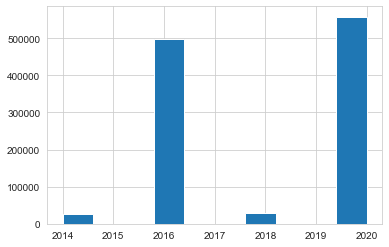

In [11]:
display(data_frame.head())
# Imprimindo as últimas linhas
display(data_frame.tail())
# Informações do nosso DataFrame
data_frame.describe()
# Dimensões do df_dados
data_frame.shape
plt.hist(x = data_frame['ANO_ELEICAO'])

<b> Matriz de correlação de atributos </b>

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

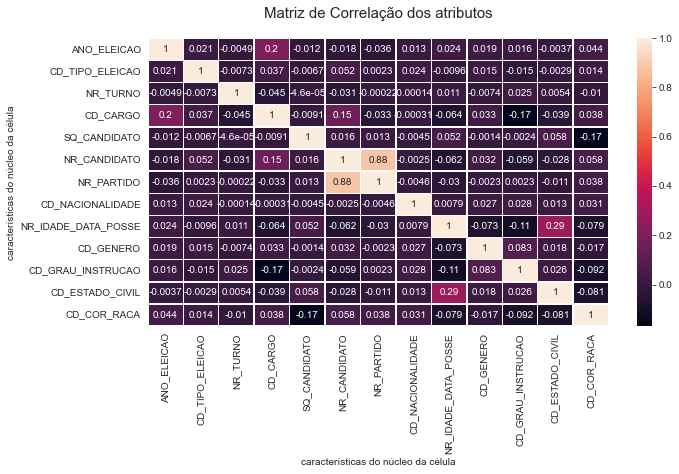

In [12]:
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = data_frame.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

<b> 2 - Dados Cassação </b>

In [13]:
print('Arquivos com extensão csv Cassação:')
concatenar = []
with os.scandir(dirCandidatoCassacaoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoCassacaoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_cassacao = pd.DataFrame()
    content_situacao = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfs = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao.append(dfs)
    # converting content to data frame
    data_frame_cassacao = pd.concat(content_situacao).drop_duplicates()

Arquivos com extensão csv Cassação:
motivo_cassacao_2014_AC.csv
motivo_cassacao_2014_AL.csv
motivo_cassacao_2014_AM.csv
motivo_cassacao_2014_AP.csv
motivo_cassacao_2014_BA.csv
motivo_cassacao_2014_BR.csv
motivo_cassacao_2014_BRASIL.csv
motivo_cassacao_2014_CE.csv
motivo_cassacao_2014_DF.csv
motivo_cassacao_2014_ES.csv
motivo_cassacao_2014_GO.csv
motivo_cassacao_2014_MA.csv
motivo_cassacao_2014_MG.csv
motivo_cassacao_2014_MS.csv
motivo_cassacao_2014_MT.csv
motivo_cassacao_2014_PA.csv
motivo_cassacao_2014_PB.csv
motivo_cassacao_2014_PE.csv
motivo_cassacao_2014_PI.csv
motivo_cassacao_2014_PR.csv
motivo_cassacao_2014_RJ.csv
motivo_cassacao_2014_RN.csv
motivo_cassacao_2014_RO.csv
motivo_cassacao_2014_RR.csv
motivo_cassacao_2014_RS.csv
motivo_cassacao_2014_SC.csv
motivo_cassacao_2014_SE.csv
motivo_cassacao_2014_SP.csv
motivo_cassacao_2014_TO.csv
motivo_cassacao_2016_AC.csv
motivo_cassacao_2016_AL.csv
motivo_cassacao_2016_AM.csv
motivo_cassacao_2016_AP.csv
motivo_cassacao_2016_BA.csv
motivo_c

In [14]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame_cassacao.isna().sum()
porc_ausentes = data_frame_cassacao.isna().sum() * 100 / len(data_frame_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
CD_ELEICAO,CD_ELEICAO,0,0.0
DS_ELEICAO,DS_ELEICAO,0,0.0
SG_UF,SG_UF,0,0.0
SG_UE,SG_UE,0,0.0
NM_UE,NM_UE,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306401,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306408,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929209,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929208,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929203,Ausência de requisito de registro


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
18143,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,MG,46094,ILICÍNEA,1152245766,Ausência de requisito de registro
18145,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62359,BOCAINA,892716418,Ausência de requisito de registro
18146,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,PA,4332,BRAGANÇA,-1732656223,Indeferimento de partido ou coligação.
18147,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,ES,56308,GOVERNADOR LINDENBERG,-1603432016,Ausência de requisito de registro
18148,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,68535,PERUÍBE,892821909,Ficha limpa (LC 64/90)


(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 1.9170e+04, 0.0000e+00,
        0.0000e+00, 2.6010e+03, 0.0000e+00, 0.0000e+00, 1.8149e+04]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

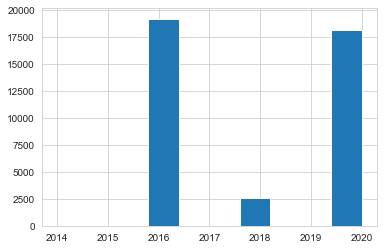

In [15]:
display(data_frame_cassacao.head())
# Imprimindo as últimas linhas
display(data_frame_cassacao.tail())
# Informações do nosso DataFrame
data_frame_cassacao.describe()
# Dimensões do df_dados
data_frame_cassacao.shape
plt.hist(x = data_frame_cassacao['ANO_ELEICAO'])

<b> Dados dos Bens do Candidatos </b>

In [16]:
print('Arquivos com extensão csv Bens:')
concatenar = []
with os.scandir(dirBemCandidato) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirBemCandidato
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_Bem_candidato = pd.DataFrame()
    content_situacao_bem = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfsb = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao_bem.append(dfsb)
    # converting content to data frame
    data_frame_Bem_candidato = pd.concat(content_situacao_bem).drop_duplicates()

Arquivos com extensão csv Bens:
bem_candidato_2014_AC.csv
bem_candidato_2014_AL.csv
bem_candidato_2014_AM.csv
bem_candidato_2014_AP.csv
bem_candidato_2014_BA.csv
bem_candidato_2014_BR.csv
bem_candidato_2014_BRASIL.csv
bem_candidato_2014_CE.csv
bem_candidato_2014_DF.csv
bem_candidato_2014_ES.csv
bem_candidato_2014_GO.csv
bem_candidato_2014_MA.csv
bem_candidato_2014_MG.csv
bem_candidato_2014_MS.csv
bem_candidato_2014_MT.csv
bem_candidato_2014_PA.csv
bem_candidato_2014_PB.csv
bem_candidato_2014_PE.csv
bem_candidato_2014_PI.csv
bem_candidato_2014_PR.csv
bem_candidato_2014_RJ.csv
bem_candidato_2014_RN.csv
bem_candidato_2014_RO.csv
bem_candidato_2014_RR.csv
bem_candidato_2014_RS.csv
bem_candidato_2014_SC.csv
bem_candidato_2014_SE.csv
bem_candidato_2014_SP.csv
bem_candidato_2014_TO.csv
bem_candidato_2016_AC.csv
bem_candidato_2016_AL.csv
bem_candidato_2016_AM.csv
bem_candidato_2016_AP.csv
bem_candidato_2016_BA.csv
bem_candidato_2016_BRASIL.csv
bem_candidato_2016_CE.csv
bem_candidato_2016_ES.cs

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065574,23,41,Caderneta de poupança,OUROCAP TORCIDA PU,2552.25,12/07/2018,16:36:00
1,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065722,1,32,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 20% NA FIRMA AS U DE CASTRO LI...,8000.00,12/07/2018,16:36:00
2,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065869,1,19,Outros bens imóveis,PROPRIETÁRIO DA EMPRESA E S DE MELO - CNPJ 04....,100000.00,12/07/2018,16:36:00
3,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065409,4,61,Depósito bancário em conta corrente no País,SALDO EM CONTA BANCÁRIA (BANCO DO BRASIL),937.91,12/07/2018,16:36:00
4,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065627,3,32,Quotas ou quinhões de capital,CLINICA MÉDICA,600000.00,12/07/2018,16:36:00


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
1013913,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,CE,14176,IPU,-128342282,1,13,Terreno,"UM TERRENO LOCALZIADO NA TRAVESSA IBIAPABA, CA...",200000.0,15/11/2020,22:52:18
1013914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MT,89931,SÃO JOSÉ DOS QUATRO MARCOS,-1667922591,3,29,Outros bens móveis,Bovino 13 a 24 meses Femea 4,7200.0,15/11/2020,22:37:08
1013915,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,45950,IBIRITÉ,1152227231,1,12,Casa,Casa,150000.0,30/10/2020,15:48:13
1013917,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,52558,SÃO JOÃO EVANGELISTA,1152242648,3,21,"Veículo automotor terrestre: caminhão, automóv...",I 30 2010,30000.0,17/11/2020,15:52:44
1013918,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PA,4537,CONCEIÇÃO DO ARAGUAIA,-1732827553,1,32,Quotas ou quinhões de capital,70% DO CAPITAL SOCIAL DA EMPRESA TRANSAQUINO T...,350000.0,06/08/2021,11:30:41


(array([  83053.,       0.,       0.,  977510.,       0.,       0.,
          93546.,       0.,       0., 1013919.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

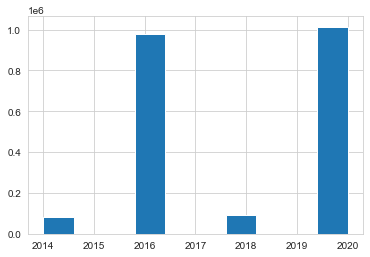

In [17]:
display(data_frame_Bem_candidato.head())
# Imprimindo as últimas linhas
display(data_frame_Bem_candidato.tail())
# Informações do nosso DataFrame
data_frame_Bem_candidato.describe()
# Dimensões do df_dados
data_frame_Bem_candidato.shape
#CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
plt.hist(x = data_frame_Bem_candidato['ANO_ELEICAO'])

<b>ANÁLISE DADOS</b>

<b> Agrupamento de dados selecionando dados de interesse: </b> Dados do candidato 

In [18]:
#Seleção das colunas de interesse
df_consulta_candidato = data_frame[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO','SG_UF','SG_UE','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO','ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO','CD_GRAU_INSTRUCAO','DS_SITUACAO_CANDIDATURA', 'DT_NASCIMENTO']]

In [20]:
#Seleção das colunas de interesse
df_consulta_cassacao = data_frame_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','DS_MOTIVO_CASSACAO']]
display(df_consulta_cassacao.head())
# Imprimindo as últimas linhas
display(df_consulta_cassacao.tail())
# Informações do nosso DataFrame
df_consulta_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
0,1345306401,2014,Ausência de requisito de registro
1,1345306408,2014,Ficha limpa (LC 64/90)
1,-582929209,2014,Ausência de requisito de registro
2,-582929208,2014,Ausência de requisito de registro
3,-582929203,2014,Ausência de requisito de registro


,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
18143,1152245766,2020,Ausência de requisito de registro
18145,892716418,2020,Ausência de requisito de registro
18146,-1732656223,2020,Indeferimento de partido ou coligação.
18147,-1603432016,2020,Ausência de requisito de registro
18148,892821909,2020,Ficha limpa (LC 64/90)


,SQ_CANDIDATO,ANO_ELEICAO
count,3.992500e+04,39925.000000
mean,2.045738e+07,2017.948353
std,1.180919e+09,1.933479
min,-1.993005e+09,2014.000000
25%,-1.538369e+09,2016.000000
50%,8.919356e+08,2018.000000
75%,1.022686e+09,2020.000000
max,1.411339e+09,2020.000000


<b> Agrupamento de dados selecionando dados de interesse: </b>Dados do Cassação 

In [21]:
m_df_candidato_cassacao = pd.merge(df_consulta_candidato, df_consulta_cassacao, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [22]:
display(m_df_candidato_cassacao.head())
# Imprimindo as últimas linhas
display(m_df_candidato_cassacao.tail())
# Informações do nosso DataFrame
m_df_candidato_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,7,APTO,16/09/1972,NaN
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,4,APTO,06/04/1971,NaN
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,2,APTO,16/09/1968,NaN
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,8,APTO,01/10/1985,NaN
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,N,4,8,APTO,19/04/1977,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,N,MUNICIPAL,ELEITO POR QP,N,S,2,3,APTO,20/05/1962,NaN
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,4,8,APTO,24/12/1987,NaN
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,S,MUNICIPAL,ELEITO POR MÉDIA,S,S,2,8,APTO,22/11/1961,NaN
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,N,MUNICIPAL,ELEITO,N,S,2,8,APTO,20/07/1949,NaN
1114723,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,2,4,APTO,03/08/1974,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO
count,1.114724e+06,1.114724e+06,1.114724e+06,1.114724e+06,1.114651e+06,1.114724e+06,1.114724e+06
mean,3.638329e+07,2.018013e+03,2.886408e+04,3.108859e+01,4.531814e+01,2.652535e+00,5.703951e+00
std,1.143599e+09,2.043658e+00,2.132544e+04,2.033771e+01,1.198006e+01,9.393679e-01,1.778375e+00
min,-1.993005e+09,2.014000e+03,1.000000e+01,1.000000e+01,-9.510000e+02,-4.000000e+00,-4.000000e+00
25%,-5.829339e+08,2.016000e+03,1.322200e+04,1.400000e+01,3.700000e+01,2.000000e+00,4.000000e+00
50%,8.919058e+08,2.020000e+03,2.212500e+04,2.300000e+01,4.500000e+01,2.000000e+00,6.000000e+00
75%,1.086245e+09,2.020000e+03,4.400000e+04,4.500000e+01,5.300000e+01,4.000000e+00,7.000000e+00
max,1.411349e+09,2.020000e+03,9.099900e+04,9.000000e+01,9.990000e+02,4.000000e+00,8.000000e+00


<b> Tratamento dos dados da Idade </b>

In [23]:
#removendo dados com todas linhas faltando dados
m_df_candidato_cassacao.dropna(how='all', inplace=True)
#descobrindo a idade média
mediaIdade = round(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].mean(),0)
print(mediaIdade)
# Preenchendo a coluna com o valor da média:
m_df_candidato_cassacao.update(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].fillna(mediaIdade))
# Dimensões do df_dados
m_df_candidato_cassacao.shape

45.0


(1114724, 26)

In [24]:
m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1114724
mean          45
std           11
min         -951
25%           37
50%           45
75%           53
max          999
Name: NR_IDADE_DATA_POSSE, dtype: int32

<b> Criação de DataSet com dados para tratamento de distorções: </b>

In [25]:
idade_max = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]
idade_min = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]

In [26]:
#Seleção das colunas de interesse
df_ida_max = idade_max[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_max

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
40476,2016,AM,12345,944.0,09/04/1072,NAILSON ALVES DE CAMPOS,09/04/1072
41781,2016,AM,45888,999.0,31/01/0976,MARIA IZABEL PINTO BARBOSA,31/01/0976
42443,2016,AM,45000,999.0,27/09/0072,LUCAS DOS SANTOS CORREA,27/09/0072
43467,2016,AM,40333,999.0,30/03/0970,ERISVALDO FERREIRA TAVARES,30/03/0970
148418,2016,MG,22456,999.0,21/08/0065,REINALDO DUARTE FERNANDES,21/08/0065
233986,2016,PE,21021,999.0,28/09/0076,TATIANO PATRICIO DA COSTA CUNHA,28/09/0076
353182,2016,RR,55111,999.0,01/04/0082,VANDERSON ANTONIO PORTO CAMPOS,01/04/0082
377845,2016,RS,15,967.0,27/05/1049,ALAOR PASTORIZA RIBEIRO,27/05/1049
544411,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193
544412,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193


Fonte: Repositório de dados eleitorais ( https://www.tse.jus.br/hotsites/catalogo-publicacoes/pdf/relatorio_eleicoes/relatorio-eleicoes-2014.pdf ) Relatório das Eleições 2014
Parte III – Um Olhar Infográfico - 52 considerou idades com Inválidas e sem tratamentos

In [27]:
#Seleção das colunas de interesse
df_ida_min = idade_min[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_min

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
111287,2016,CE,51200,12.0,13/12/2004,FRANCISCO FABIO GUEDES UCHÔA,13/12/2004
119728,2016,MS,55222,-951.0,12/12/2968,JAIME CARDOSO DA CRUZ,12/12/2968
572215,2020,AM,27206,17.0,24/02/2003,FRANCINEIA OLIVEIRA DE SOUZA,24/02/2003
682854,2020,PA,10700,17.0,30/06/2003,DEYSE ADRIELE DA SILVA SARMANHO,30/06/2003
879018,2020,PE,36111,16.0,03/03/2004,LUIZ ALMEIDA,03/03/2004


In [28]:
for index, row in df_ida_max.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = mediaIdade
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str(mediaIdade))
    print('--------------------------------------')

40476
Candidato: 12345
Nome: NAILSON ALVES DE CAMPOS
Data Nascimento: DT_NASCIMENTO    09/04/1072
DT_NASCIMENTO    09/04/1072
Name: 40476, dtype: object
Idade Antiga: 944.0
Idade Aualizada: 45.0
--------------------------------------
41781
Candidato: 45888
Nome: MARIA IZABEL PINTO BARBOSA
Data Nascimento: DT_NASCIMENTO    31/01/0976
DT_NASCIMENTO    31/01/0976
Name: 41781, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
42443
Candidato: 45000
Nome: LUCAS DOS SANTOS CORREA
Data Nascimento: DT_NASCIMENTO    27/09/0072
DT_NASCIMENTO    27/09/0072
Name: 42443, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
43467
Candidato: 40333
Nome: ERISVALDO FERREIRA TAVARES
Data Nascimento: DT_NASCIMENTO    30/03/0970
DT_NASCIMENTO    30/03/0970
Name: 43467, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
148418
Candidato: 22456
Nome: REINALDO DUARTE FERNANDES
Da

In [29]:
for index, row in df_ida_min.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = 18
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str('18'))
    print('--------------------------------------')

111287
Candidato: 51200
Nome: FRANCISCO FABIO GUEDES UCHÔA
Data Nascimento: DT_NASCIMENTO    13/12/2004
DT_NASCIMENTO    13/12/2004
Name: 111287, dtype: object
Idade Antiga: 12.0
Idade Aualizada: 18
--------------------------------------
119728
Candidato: 55222
Nome: JAIME CARDOSO DA CRUZ
Data Nascimento: DT_NASCIMENTO    12/12/2968
DT_NASCIMENTO    12/12/2968
Name: 119728, dtype: object
Idade Antiga: -951.0
Idade Aualizada: 18
--------------------------------------
572215
Candidato: 27206
Nome: FRANCINEIA OLIVEIRA DE SOUZA
Data Nascimento: DT_NASCIMENTO    24/02/2003
DT_NASCIMENTO    24/02/2003
Name: 572215, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
--------------------------------------
682854
Candidato: 10700
Nome: DEYSE ADRIELE DA SILVA SARMANHO
Data Nascimento: DT_NASCIMENTO    30/06/2003
DT_NASCIMENTO    30/06/2003
Name: 682854, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
--------------------------------------
879018
Candidato: 36111
Nome: LUIZ ALMEIDA
Data Na

In [30]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [31]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [32]:
m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1114724
mean          45
std           11
min           18
25%           37
50%           45
75%           53
max          101
Name: NR_IDADE_DATA_POSSE, dtype: int32

In [33]:
#Calcula o total e a % de valores ausentes
num_ausentes = m_df_candidato_cassacao.isna().sum()
porc_ausentes = m_df_candidato_cassacao.isna().sum() * 100 / len(m_df_candidato_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': m_df_candidato_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
SQ_CANDIDATO,SQ_CANDIDATO,0,0.000000
ANO_ELEICAO,ANO_ELEICAO,0,0.000000
NR_CANDIDATO,NR_CANDIDATO,0,0.000000
NM_CANDIDATO,NM_CANDIDATO,0,0.000000
DS_CARGO,DS_CARGO,0,0.000000
NR_PARTIDO,NR_PARTIDO,0,0.000000
SG_PARTIDO,SG_PARTIDO,0,0.000000
SG_UF,SG_UF,0,0.000000
SG_UE,SG_UE,0,0.000000
DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,0,0.000000


In [34]:
data_frame['SQ_CANDIDATO'].unique()
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

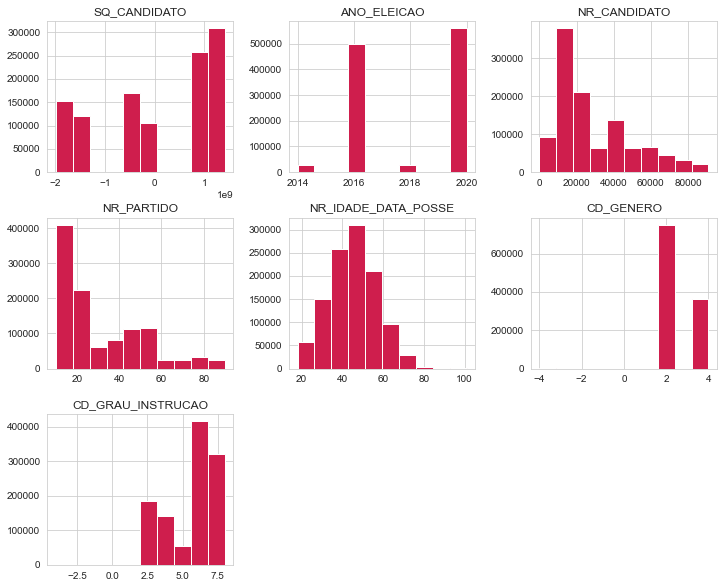

In [35]:
# Definindo as configurações do Gráfico
m_df_candidato_cassacao.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

<b> Selecionando alguns dados para análise </b>

In [36]:
#Seleção das colunas de interesse
df_candidato_cassacao = m_df_candidato_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO' ,'SG_UF','SG_UE','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO','ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO','CD_GRAU_INSTRUCAO', 'DS_MOTIVO_CASSACAO','DS_SITUACAO_CANDIDATURA']]

In [37]:
df_candidato_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_MOTIVO_CASSACAO,DS_SITUACAO_CANDIDATURA
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,7,NaN,APTO
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,4,NaN,APTO
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,2,NaN,APTO
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,8,NaN,APTO
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,N,4,8,NaN,APTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,ELEITO POR QP,ELEITO POR QP,ELEITO POR QP,N,N,S,2,3,NaN,APTO
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO,N,N,S,4,8,NaN,APTO
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,ELEITO POR MÉDIA,ELEITO POR MÉDIA,ELEITO POR MÉDIA,S,S,S,2,8,NaN,APTO
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,ELEITO,ELEITO,ELEITO,N,N,S,2,8,NaN,APTO


In [38]:
m_df_candidato_bem_cassacao = pd.merge(df_candidato_cassacao, data_frame_Bem_candidato, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [39]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

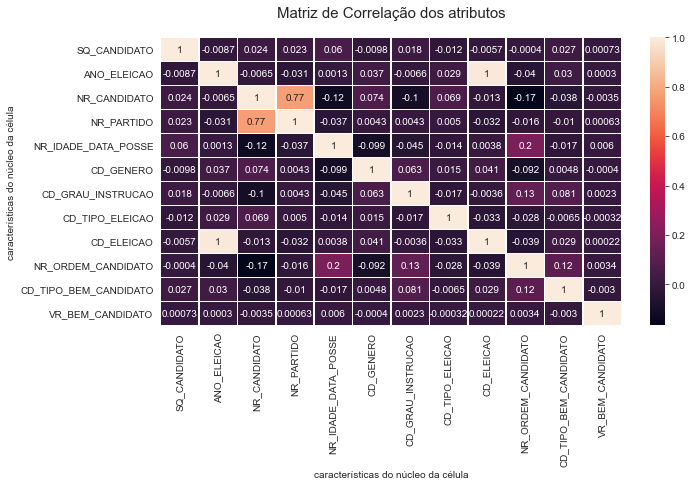

In [40]:
# Gráfico de Matriz de Correlação 
df_small = m_df_candidato_bem_cassacao.copy()
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

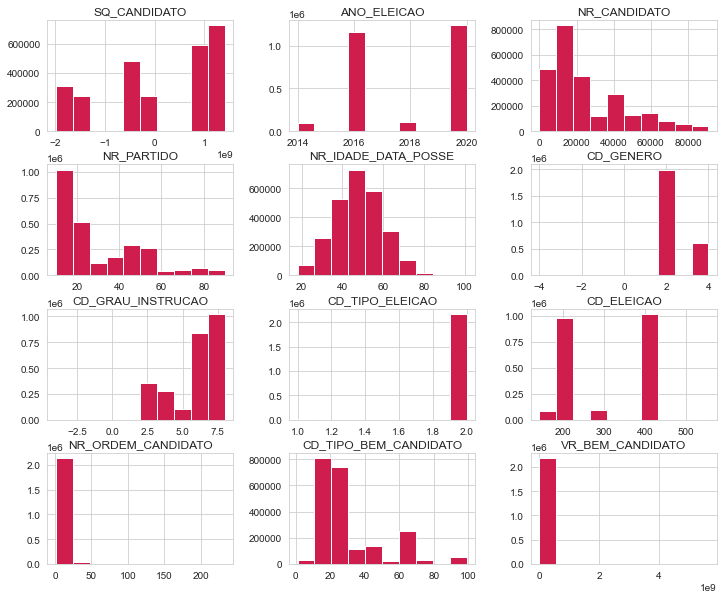

In [41]:
# Gráfico Histogramas 
df_small = m_df_candidato_bem_cassacao.copy()
# Definindo as configurações do Gráfico
df_small.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

In [42]:
m_df_candidato_bem_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,13.0,Terreno,"MED. 25X50, BR 364 - KM 04 - RAMAL DO HERCULAN...",50000.0,12/07/2018,16:36:00
1,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,12.0,Casa,"EM ALVENARIA MED. 8X8, TERRENO 15X30",50000.0,12/07/2018,16:36:00
2,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",MOTO HONDA CG TITAN 2005/2005 COR VERMELHA - P...,1500.0,12/07/2018,16:36:00
3,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,32.0,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 20% NA FIRMA AS U DE CASTRO LI...,8000.0,12/07/2018,16:36:00
4,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,32.0,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 33.33% NA FIRMA AUTO POSTO PRO...,60000.0,12/07/2018,16:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598596,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,18.0,63.0,Dinheiro em espécie - moeda nacional,Dinheiro em espécie,35000.0,15/11/2020,22:03:16
2598597,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,3.0,12.0,Casa,"Casa em alvenaria com 263,18 metros quadrados",70000.0,15/11/2020,22:03:16
2598598,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,5.0,14.0,Terra nua,Parte do lote rural numero 3 do bloco sertãozi...,60000.0,15/11/2020,22:03:16
2598599,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,SP,68535,PERUÍBE,2.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",CG Fan 125 2008,3000.0,16/09/2021,17:03:28


In [43]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

In [44]:
m_df_candidato_bem_cassacao['DS_CARGO'].unique()

<StringArray>
[ 'DEPUTADO ESTADUAL',   'DEPUTADO FEDERAL',        '2º SUPLENTE',
            'SENADOR',        '1º SUPLENTE',         'GOVERNADOR',
    'VICE-GOVERNADOR',         'PRESIDENTE',    'VICE-PRESIDENTE',
 'DEPUTADO DISTRITAL',           'VEREADOR',      'VICE-PREFEITO',
           'PREFEITO']
Length: 13, dtype: string

In [45]:
cassados = m_df_candidato_bem_cassacao.loc[m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].notnull()]

In [46]:
cassados['DS_CARGO'].unique()

<StringArray>
[        'GOVERNADOR',    'VICE-GOVERNADOR',           'VEREADOR',
           'PREFEITO',      'VICE-PREFEITO',  'DEPUTADO ESTADUAL',
   'DEPUTADO FEDERAL',            'SENADOR',        '1º SUPLENTE',
        '2º SUPLENTE',         'PRESIDENTE', 'DEPUTADO DISTRITAL']
Length: 12, dtype: string

Para iniciar a exploração dos dados será apresentado um sumário estatístico 
das variáveis com dados numéricos

In [47]:
data_frame_Bem_candidato.describe().round(2).astype(str)

,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_ELEICAO,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
count,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0,2168028.0
mean,2017.88,2.0,317.11,93588773.4,4.43,27.63,116493.88
std,2.07,0.06,104.8,1077080838.07,7.59,20.23,7044922.47
min,2014.0,1.0,143.0,-1993005055.0,1.0,1.0,-113.14
25%,2016.0,2.0,220.0,-517378277.25,1.0,13.0,7000.0
50%,2018.0,2.0,297.0,891903141.0,2.0,21.0,25000.0
75%,2020.0,2.0,426.0,1086242474.0,5.0,32.0,78211.68
max,2020.0,2.0,554.0,1411340335.0,233.0,99.0,5668873558.0


In [48]:
#Seleção das colunas de interesse
cassados[['SQ_CANDIDATO','ANO_ELEICAO','VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,ANO_ELEICAO,VR_BEM_CANDIDATO
2948,1345306401,2014,307500.00
3857,1345306408,2014,550000.00
29886,-582929203,2014,200000.00
43154,-582929209,2014,539715.75
43155,-582929209,2014,35000.00
...,...,...,...
2597661,1022289797,2020,3538.41
2597662,1022289797,2020,1700.08
2597710,892893849,2020,18000.00
2597856,-1603290802,2020,200000.00


<AxesSubplot:>

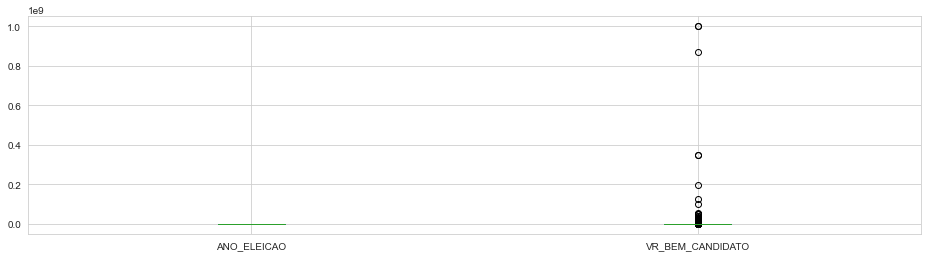

In [49]:
cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']].boxplot(figsize=(16,4))

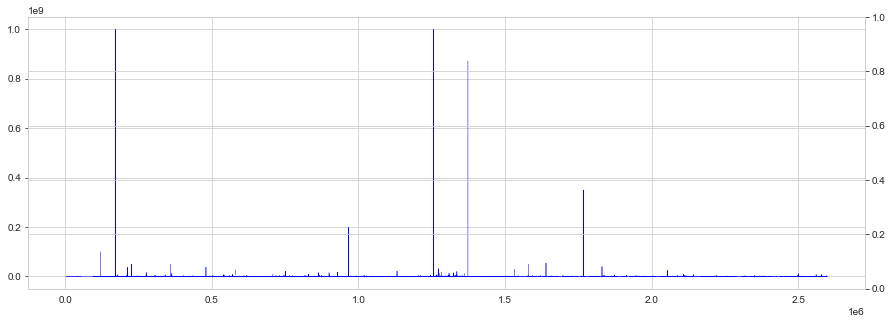

In [50]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']], 'b', linewidth=0.5)

In [51]:
#Descrição estatística do dataframe df_bem após agrupamento
cassados['VR_BEM_CANDIDATO'].describe().astype('int')

count         50224
mean         199492
std         7861641
min               0
25%            8000
50%           28000
75%           90000
max      1000000000
Name: VR_BEM_CANDIDATO, dtype: int32

In [57]:
data_frame_bem_maior_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] > 10000000)]

In [58]:
data_frame_bem_maior_10_mil.loc[(data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO'] == data_frame_Bem_candidato['VR_BEM_CANDIDATO'].max())]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
935608,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,4,99,OUTROS BENS E DIREITOS,Bens em comum do casal,5.668874e+09,10/12/2020,17:19:26


In [59]:
data_frame_bem_maior_10_mil.describe().round(2).astype(str)

,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_ELEICAO,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
count,755.0,755.0,755.0,755.0,755.0,755.0,755.0
mean,2017.68,1.99,304.76,-74711498.59,12.59,30.18,104064628.65
std,2.07,0.07,102.02,1158962071.31,21.59,21.87,362922280.26
min,2014.0,1.0,143.0,-1993004973.0,1.0,1.0,10033324.0
25%,2016.0,2.0,220.0,-1538907142.0,1.0,14.0,14983976.0
50%,2018.0,2.0,297.0,-129541540.0,4.0,21.0,22091320.16
75%,2020.0,2.0,426.0,1022041227.0,15.0,32.0,54998558.66
max,2020.0,2.0,438.0,1410667697.0,187.0,99.0,5668873558.0


In [60]:
data_frame_bem_maior_10_mil[['SQ_CANDIDATO','DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO']]

,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
345,-1474836205,Ações (inclusive as provenientes de linha tele...,1.960319e+08
368,-1474836205,Quotas ou quinhões de capital,1.498795e+07
755,-1474836205,Ações (inclusive as provenientes de linha tele...,1.629974e+07
1163,-1539606910,Quotas ou quinhões de capital,3.937500e+07
56,-194312208,Quotas ou quinhões de capital,1.743490e+07
...,...,...,...
998201,-1733057071,Terra nua,1.140000e+07
1000286,1151996987,Terra nua,1.400000e+07
1002579,-517510115,OUTROS BENS E DIREITOS,2.976333e+07
1008246,1152148935,Casa,1.800000e+08


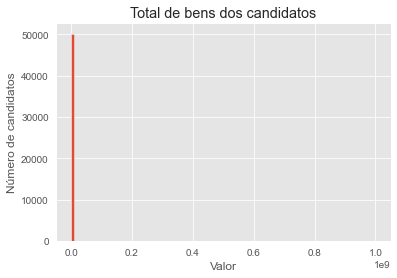

In [61]:
#Plotagem do histograma dos valores dos bens dos candidatos - corrigido
cassados.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos")
plt.show()

In [62]:
#Criação de um dataframe final com candidatos eleitos
df_eleitos = data_frame[data_frame.DS_SIT_TOT_TURNO.isin(['ELEITO POR MÉDIA','ELEITO POR QP'])]

In [63]:
#Transformação de valores categóricos em valores inteiros
dadosCategoricos = pd.get_dummies(data_frame[['NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO' ]])

In [64]:
m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['SQ_CANDIDATO'] == 1022458107)]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
2121396,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,6.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",JET SKI,8.300000e+03,15/11/2020,22:57:54
2121397,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,1.0,12.0,Casa,CASA NA ESTRADA DA VIDINHA - ANGRA DOS REIS - RJ,4.000000e+05,15/11/2020,22:57:54
2121398,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,2.0,18.0,Loja,LOJA ANGRA SHOPPING - ANGRA DOS REIS - RJ,3.000000e+04,15/11/2020,22:57:54
2121399,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,13.0,2.0,Prédio comercial,PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ,4.910551e+09,15/11/2020,22:57:54
2121400,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,7.0,26.0,Linha telefônica,LINHAS,8.327660e+03,15/11/2020,22:57:54
2121401,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,3.0,12.0,Casa,IMVEL NA RUA ANFILOQUIO NUNES PIRES - GASPAR -...,8.509912e+04,15/11/2020,22:57:54
2121402,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,4.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",AUTOMOVEL ACTION,9.990000e+04,15/11/2020,22:57:54
2121403,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,12.0,49.0,Outras aplicações e Investimentos,ALUGUEIS E TAXAS IMOVEL SITUADO EM BOTAFORO - RJ,5.000000e+05,15/11/2020,22:57:54
2121404,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,14.0,11.0,Apartamento,"UM APARTAMENTO NA RUA BAMBINA, BOTAFOGO - RIO ...",3.399356e+05,15/11/2020,22:57:54
2121405,1022458107,2020,43,MARIO DESCHAMPS,PREFEITO,43,PV,RJ,58017,NÃO ELEITO,...,RJ,58017,ANGRA DOS REIS,9.0,45.0,"Aplicação de renda fixa (CDB, RDB e outros)",BANCO DO BRASIL,2.500000e+05,15/11/2020,22:57:54


In [65]:
m_df_candidato_bem_cassacao['DS_SITUACAO_CANDIDATURA'].unique()

<StringArray>
['APTO', 'INAPTO', 'CADASTRADO']
Length: 3, dtype: string

In [66]:
m_df_candidato_bem_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,13.0,Terreno,"MED. 25X50, BR 364 - KM 04 - RAMAL DO HERCULAN...",50000.0,12/07/2018,16:36:00
1,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,12.0,Casa,"EM ALVENARIA MED. 8X8, TERRENO 15X30",50000.0,12/07/2018,16:36:00
2,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",MOTO HONDA CG TITAN 2005/2005 COR VERMELHA - P...,1500.0,12/07/2018,16:36:00
3,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,1.0,32.0,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 20% NA FIRMA AS U DE CASTRO LI...,8000.0,12/07/2018,16:36:00
4,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,AC,AC,ACRE,2.0,32.0,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 33.33% NA FIRMA AUTO POSTO PRO...,60000.0,12/07/2018,16:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598596,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,18.0,63.0,Dinheiro em espécie - moeda nacional,Dinheiro em espécie,35000.0,15/11/2020,22:03:16
2598597,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,3.0,12.0,Casa,"Casa em alvenaria com 263,18 metros quadrados",70000.0,15/11/2020,22:03:16
2598598,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,SC,81515,IPUMIRIM,5.0,14.0,Terra nua,Parte do lote rural numero 3 do bloco sertãozi...,60000.0,15/11/2020,22:03:16
2598599,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,SP,68535,PERUÍBE,2.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",CG Fan 125 2008,3000.0,16/09/2021,17:03:28


<b>Regressão Linear</b> 
De acordo com o google: "A regressão linear quantifica a relação entre uma ou mais variáveis ​​preditoras e uma variável de resultado. Por exemplo, a regressão linear pode ser usada para quantificar os impactos relativos de idade, sexo e dieta (as variáveis ​​preditoras) na altura (a variável de desfecho)."

O modelo de regressão linear é baseado em uma equação de primeiro grau, com a fórmula sendo: y = ax + b. O "x" é o coeficiente angular e o "b" é o coeficiente linear.

Coeficiente angular: indica a inclinação da reta Coeficiente linear: realiza a intersecção com o eixo x

A fórmula da regressão linear busca, justamente, encontrar o valor de a e de b. Neste caso, utilizaremos esse modelo para estimar um novo valor baseado nos atributos de entrada.

Ajustaremos uma equação linear entre os dados observados, ou seja, encontraremo uma reta que melhor explica a relação entre os dados.

Para saber mais sobre a regressão linear visite: https://oestatistico.com.br/regressao-linear-simples/

In [67]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_eleitos = Counter(df_eleitos['DS_GENERO'])
genero_candidatos_eleitos

Counter({'MASCULINO': 101514, 'FEMININO': 17514, 'NÃO DIVULGÁVEL': 3})

In [68]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_cassados = Counter(cassados['DS_GENERO'])
genero_candidatos_cassados

Counter({'FEMININO': 18905, 'MASCULINO': 52878})

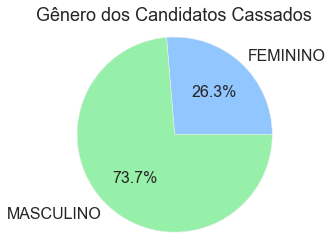

In [69]:
#Plotagem das informações de gênero dos candidatos
plt.style.use('seaborn-pastel')
plt.pie(genero_candidatos_cassados.values(), labels = genero_candidatos_cassados.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.axis("image")
plt.title("Gênero dos Candidatos Cassados", fontsize=18)
plt.show()

In [70]:
idade_cassados = Counter(cassados['NR_IDADE_DATA_POSSE'])
#idade_cassados

In [71]:
idade_publico = Counter(m_df_candidato_bem_cassacao['NR_IDADE_DATA_POSSE'])
#idade_publico

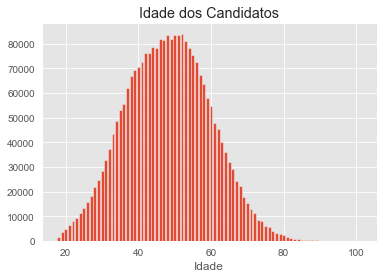

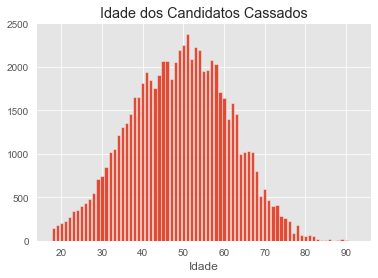

In [72]:
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()
#------------------------------------
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_cassados.keys(), idade_cassados.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos Cassados')
plt.show()

In [73]:
idade_cal = Counter(m_df_candidato_bem_cassacao['NR_PARTIDO'])
#idade_cal

In [74]:
m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'].describe().astype('int')

count       2179696
mean         117234
std         7031343
min            -113
25%            7000
50%           25000
75%           79000
max     -2147483648
Name: VR_BEM_CANDIDATO, dtype: int32

In [75]:
data_frame_bem_maior_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] > 10000000)]

In [76]:
data_frame_bem_menor_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] < 10000000)]

In [77]:
data_frame_bem_menor_10_mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167202 entries, 0 to 1013918
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DT_GERACAO             object 
 1   HH_GERACAO             object 
 2   ANO_ELEICAO            int32  
 3   CD_TIPO_ELEICAO        int64  
 4   NM_TIPO_ELEICAO        object 
 5   CD_ELEICAO             int64  
 6   DS_ELEICAO             object 
 7   DT_ELEICAO             object 
 8   SG_UF                  object 
 9   SG_UE                  object 
 10  NM_UE                  object 
 11  SQ_CANDIDATO           int32  
 12  NR_ORDEM_CANDIDATO     int64  
 13  CD_TIPO_BEM_CANDIDATO  int64  
 14  DS_TIPO_BEM_CANDIDATO  object 
 15  DS_BEM_CANDIDATO       object 
 16  VR_BEM_CANDIDATO       float64
 17  DT_ULTIMA_ATUALIZACAO  object 
 18  HH_ULTIMA_ATUALIZACAO  object 
dtypes: float64(1), int32(2), int64(4), object(12)
memory usage: 314.2+ MB


In [78]:
data_frame_Bem_candidato.sort_values(by='VR_BEM_CANDIDATO', ascending=False, inplace = True)

(array([729.,  15.,   5.,   2.,   1.,   1.,   0.,   0.,   1.,   1.]),
 array([1.00333240e+07, 5.75917347e+08, 1.14180137e+09, 1.70768539e+09,
        2.27356942e+09, 2.83945344e+09, 3.40533746e+09, 3.97122149e+09,
        4.53710551e+09, 5.10298953e+09, 5.66887356e+09]),
 <BarContainer object of 10 artists>)

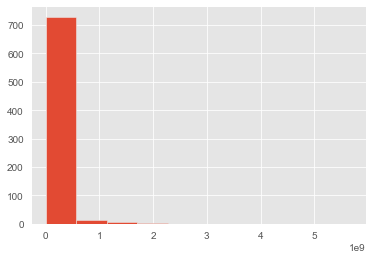

In [79]:
plt.hist(x = data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO'])

In [80]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('ID Bem: ' + str(row['CD_TIPO_BEM_CANDIDATO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

345
Candidato: -1474836205
Ano: 2014
ID Bem: 31
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
ID Bem: 31
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: Q

555026
Candidato: 891976359
Ano: 2016
ID Bem: 13
Tipo de Bem: Terreno
Descrição: SÍTIO EM BIRITIBA MIRIM
Valor 25000000.0

556490
Candidato: 1151050391
Ano: 2016
ID Bem: 45
Tipo de Bem: Aplicação de renda fixa (CDB, RDB e outros)
Descrição: DIVERSAS APLICAÇÕES EM POUPANÇA E FUNDOS DE INVESTIMENTOS EM DIVERSAS INSTITUIÇÕES BANCÁRIAS NO BRASIL
Valor 13447015.52

557856
Candidato: -1669140532
Ano: 2016
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: INTEGRALIZAÇÃO DE QUOTAS NO FUNDO DE INVESTIMENTO EM DIREITOS CREDITÓRIOS NÃO-PADRONIZADOS AGRONEGÓCIO FUNDING I - FIDC¿NP. AQUISICAO JUNTO BANCO INDUSVAL S.A CNPJ 61.024.352/0001-71
Valor 10237211.0

561419
Candidato: -129534955
Ano: 2016
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS NA EMPRESA CMACK
Valor 20000000.0

571303
Candidato: 1151041636
Ano: 2016
ID Bem: 19
Tipo de Bem: Outros bens imóveis
Descrição: VINTE E SEIS LOTES DE TERRENOS E RESPECTIVA ACESSÕES LOCALIZADOS NO BAIRRO IGUAÇU IPATINGA/

50724
Candidato: 892497258
Ano: 2018
ID Bem: 99
Tipo de Bem: OUTROS BENS E DIREITOS
Descrição: 3) 50% (cinquenta por cento) de um imóvel urbano denominado lote 14, da quadra 135, do Loteamento Residencial Campo Belo. Valor de R$50.642,00 
Valor 50642000.0

52924
Candidato: -193699743
Ano: 2018
ID Bem: 79
Tipo de Bem: Outros fundos
Descrição: #NULO#
Valor 20847318.75

53584
Candidato: -128937028
Ano: 2018
ID Bem: 31
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: PARTICIPAÇÃO DE 99,99% NA SOCIEDADE REMMO PARTICIPAÇÕES S/A
Valor 19762999.0

54485
Candidato: -1668536983
Ano: 2018
ID Bem: 31
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: POSSUI 52.859.440 ACOES ORDINARIA NOMINATIVAS E 52.859.440 ACOES PREFERENCIAIS NOMINATIVAS JUNTO A EMPRESA BIPAR INVESTIMENTOS E PARTICIPACOES, CFE AGO E BOLETIM DE SUBSCRICAO 19/12/2011
Valor 105718880.0

55104
Candidato: -517541350
Ano: 2018
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital

Ano: 2020
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 50% Lourenço e Souza Administradora de imóveis próprios
Valor 12875000.0

530741
Candidato: -193092301
Ano: 2020
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 68,57% DO CAPITAL SOCIAL  DA ORCA CONSTUTORA LTDA
Valor 15839670.0

533344
Candidato: -1992279686
Ano: 2020
ID Bem: 21
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: Palio winqueno
Valor 160000000.0

534676
Candidato: -1668010163
Ano: 2020
ID Bem: 32
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS FUNDO DE INVESTIMENTO FUNDING I (BANCO INDUSVAL)

Valor 10237511.0

534677
Candidato: -1668010163
Ano: 2020
ID Bem: 74
Tipo de Bem: Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado
Descrição: AÇÕES DA COMPANHIA DAKANG FIAGRIL PARTICIPAÇÕES S.A

Valor 20451629.9

534882
Candidato: 1086940573
Ano: 2020
ID Bem: 31
Tipo de Bem: Ações (

In [81]:
df1 = data_frame_bem_menor_10_mil.loc[(data_frame_bem_menor_10_mil['DS_TIPO_BEM_CANDIDATO'] == 45)]

In [82]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].describe().astype('int')	

count       2168028
mean         116493
std         7044922
min            -113
25%            7000
50%           25000
75%           78211
max     -2147483648
Name: VR_BEM_CANDIDATO, dtype: int32

In [83]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

345
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC

Descrição: UMA CASA SITUADA A RUA CAETÉ N.458 NO BAIRRO CRUZEIRO CELESTE
Valor 200000000.0

590344
Candidato: -1733898431
Ano: 2016
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: AUTOMOVEL TIPO PICK UP FIAT STRADA 2013, PLACA OTX 5720.
Valor 35000000.0

595746
Candidato: 1151050391
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: 01 FAZENDA DENOMINADA UBERABA SITUADA EM ABREULÂNDIA-TO 2.081,20HA. EMTERRA FORMADA EM DIVERSAS BENFEITORIAS
Valor 14560000.0

605252
Candidato: 1151034893
Ano: 2016
Tipo de Bem: Casa
Descrição: CASA E CHACARA RUA ITAPETINGA N. 84 - VENDA NOVA
Valor 1500000000.0

607833
Candidato: -1733906620
Ano: 2016
Tipo de Bem: Terra nua
Descrição: TERRA NOVA II  SAO FELIX DO XINGU COM AREA DE 1.452,0 HA
Valor 10500000.0

609007
Candidato: 891913647
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: IMÓVEL NA AV. BRASIL, 341 - ITAPEVI
Valor 60000000.0

610207
Candidato: -1669141484
Ano: 2016
Tipo de Bem: Outros bens imóveis
Des

Valor 73057113.0

9428
Candidato: -1538907142
Ano: 2020
Tipo de Bem: Outras participações societárias
Descrição: COTAS DE CAPITAL DA EMPRESA DAMRAK EMPREENDIMENTOS E PARTICIPAÇÕES LTDA - CNPJ 07.051.213/0001-91
Valor 157947770.0

9429
Candidato: -1538907142
Ano: 2020
Tipo de Bem: Crédito decorrente de empréstimo
Descrição: EMPRÉSTIMO EM 29/08/2008 A SOCIEDADE ATAKAREJO DISTRIBUIDOR DE ALIMENTOS E BEBIDAS LTDA, CNPJ 73.849.952/0001-58
Valor 107347684.7

13469
Candidato: -1538870377
Ano: 2020
Tipo de Bem: Outros créditos e poupança vinculados
Descrição: SALDO EM POUPANÇA B. BRADESCO $2.953,49, SALDO EM APLICAÇÃO B. BRASIL $54.313,06, 
Valor 57266550.0

20146
Candidato: -1538805469
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 99% das cotas de capital da empresa SA nacional de veículos ltda.
Valor 20295000.0

20991
Candidato: -1538786643
Ano: 2020
Tipo de Bem: Outros bens imóveis
Descrição: EMPREENDIMENTO DENOMINADO EDIFICIO MANSAO WILDBERGER SITUADO NA RUA RODRIGUES LIM

Tipo de Bem: Terra nua
Descrição: matricula 9813, matricula 9811, matricula 203, matricula 3254, matricula 5892
Valor 10604000.0

905120
Candidato: -1732669227
Ano: 2020
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: carro fiatpalio 
Valor 15500000.0

905516
Candidato: -258335947
Ano: 2020
Tipo de Bem: Outros bens imóveis
Descrição: 2371,2 HECTARES FAZ PARANAVAI EM NIOAQUE-MS ADIQUIRIDO EM 2016
Valor 14402092.5

914321
Candidato: -193161121
Ano: 2020
Tipo de Bem: OUTROS BENS E DIREITOS
Descrição: 8.000 BOVINOS E EQUINOS 
Valor 18000000.0

919822
Candidato: -516959538
Ano: 2020
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: 1(um) Veículo Yhundai IX35, ano 2012
Valor 65000000.0

927626
Candidato: -581712088
Ano: 2020
Tipo de Bem: Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado
Descrição: 33,34% DO CAPITAL DE UMA SOCIEDADE EMPRESÁRIA ARMAZÉM GERAIS M

In [84]:
#Criação de um dataframe com bens dos candidatos até R$ 10000000
df_consolidado_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]
#Criação de um dataframe com bens dos candidatos eleitos até R$ 10.000.000
df_consolidado_eleitos_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]

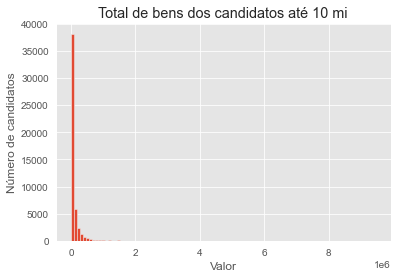

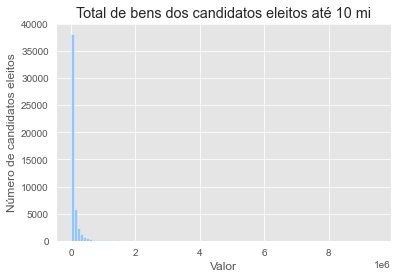

In [85]:
#Plotagem dos bens de candidatos até R$  R$ 10.000.000,00 
df_consolidado_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos até 10 mi")
plt.show()
#Plotagem dos bens de candidatos eleitos até R$  R$ 10.000.000,00 
df_consolidado_eleitos_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('ggplot')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos eleitos")
plt.title("Total de bens dos candidatos eleitos até 10 mi")
plt.show()

In [86]:
data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO']

345        1.960319e+08
368        1.498795e+07
755        1.629974e+07
1163       3.937500e+07
56         1.743490e+07
               ...     
998201     1.140000e+07
1000286    1.400000e+07
1002579    2.976333e+07
1008246    1.800000e+08
1008440    3.027153e+07
Name: VR_BEM_CANDIDATO, Length: 755, dtype: float64

In [87]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

345
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor 196031864.0

368
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor 14987952.0

755
Candidato: -1474836205
Ano: 2014
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor 16299739.0

1163
Candidato: -1539606910
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor 39375000.0

56
Candidato: -194312208
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES
Valor 17434902.0

880
Candidato: 956668094
Ano: 2014
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC

Valor 25000000.0

494351
Candidato: -259081024
Ano: 2016
Tipo de Bem: Sala ou conjunto
Descrição: UM IMOVEL COMERCIAL E RESIDENCIAL, LOCALIZADO NA RUA ANTONIO DINIZ GONÇALVES
Valor 20000000.0

494971
Candidato: -1733907319
Ano: 2016
Tipo de Bem: Casa
Descrição: De alvenaria com quatro andares, na cidade nova II we 17 n. 11
Valor 300000000.0

500481
Candidato: -194299937
Ano: 2016
Tipo de Bem: Outros bens imóveis
Descrição: PROPRIEDADE RURAL COM AREA DE 2481.70
Valor 10240000.0

506096
Candidato: 1151011466
Ano: 2016
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: VEICULOS
Valor 60000000.0

513973
Candidato: -1733912529
Ano: 2016
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 70% DAS QUOTAS DE CAPITAL DA SOCIEDADE EMPRESARIA, INTEGRAL CONSTRUCOES E COMERCIO LTDA, CNPJ NO 0.168.374/0001-10
Valor 13120195.0

518467
Candidato: -388618155
Ano: 2016
Tipo de Bem: Casa
Descrição: AV. MARGINAL TIETE, 346 CENTRO PORTO PIAUI
Valor 20000000.0

521509
Can

Ano: 2018
Tipo de Bem: Outros bens imóveis
Descrição: IMOVEL RURAL DENOMINADO FAZENDA SAO JOSE, SITUADO NA SESMARIA MARZAGAO, NO MUNICIPIO DE ROSARIO OETE/MT, SOB MATRICULA N. 14.429 DO RGI DE ROSARIO OESTE/MT, COM AREA DE 13.068 HA
Valor 22750000.0

57271
Candidato: 892511990
Ano: 2018
Tipo de Bem: Quotas ou quinhões de capital
Descrição: #NULO#
Valor 14900000.0

57601
Candidato: -1668536976
Ano: 2018
Tipo de Bem: Outras aplicações e Investimentos
Descrição: FUNDO DE INVESTIMENTO - BANCO BTG PACTUAL S.A. - CNPJ 59.281.253/0001-23 - VN FIQ DE FIM CP - IE 105 - BRASIL
Valor 201290211.41

58520
Candidato: -582320830
Ano: 2018
Tipo de Bem: Outras participações societárias
Descrição: JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2017, TRANSFORMADO EM CONTRATO DE MUTUO EM 02/01/2018 - JUROS CREDITADOS EM 2018 R$ 1.077
Valor 28831799.72

58884
Candidato: 828051826
Ano: 2018
Tipo de Bem: Outras participações societárias
Descriçã

451531
Candidato: 892677091
Ano: 2020
Tipo de Bem: VGBL - Vida Gerador de Benefício Livre
Descrição: VGBL ICATU XP INVESTIMENTOS
Valor 11668913.42

454203
Candidato: -1733002573
Ano: 2020
Tipo de Bem: Outros bens móveis
Descrição: BENS SEMOVENTES BOVINOS, ESTOQUE: 5938
Valor 14845000.0

461349
Candidato: 1086964410
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DE HTF LOCAÇÃO DE IMOVEIS LTDA
Valor 11890000.0

470238
Candidato: -516959540
Ano: 2020
Tipo de Bem: Quotas ou quinhões de capital
Descrição: quotas capital empresa centro esportivo jr03
Valor 25000000.0

471375
Candidato: 1022458107
Ano: 2020
Tipo de Bem: Prédio comercial
Descrição: PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ
Valor 4910551240.0

472839
Candidato: 892725858
Ano: 2020
Tipo de Bem: Casa
Descrição: KASATO MARÚ 141 SANTO ANDRE 
Valor 120000000.0

478449
Candidato: -581966385
Ano: 2020
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: gol, placa NSJ8778

In [88]:
maior_10mi = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [89]:
df_10_mil = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [90]:
maior_10mi['VR_BEM_CANDIDATO'].describe().astype('int')

count           780
mean      102088970
std       357422502
min        10033324
25%        14808375
50%        22000000
75%        54901779
max     -2147483648
Name: VR_BEM_CANDIDATO, dtype: int32

In [91]:
df_10_mil

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
2598,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,39.0,31.0,Ações (inclusive as provenientes de linha tele...,LAGINHA AGRO INDUSTRIAL S/A,1.960319e+08,12/07/2018,16:35:40
2602,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,42.0,32.0,Quotas ou quinhões de capital,LUG TAXI AEREO LTDA,1.498795e+07,12/07/2018,16:35:40
2626,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,49.0,31.0,Ações (inclusive as provenientes de linha tele...,INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUST...,1.629974e+07,12/07/2018,16:35:40
6578,-1539606910,2014,4567,JOÃO GUALBERTO VASCONCELOS,DEPUTADO FEDERAL,45,PSDB,BA,BA,ELEITO POR QP,...,BA,BA,BAHIA,10.0,32.0,Quotas ou quinhões de capital,QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA,3.937500e+07,12/07/2018,16:35:46
10831,956668181,2014,111,IVONE MEZZOMO CASSOL,SENADOR,11,PP,RO,RO,NÃO ELEITO,...,RO,RO,RONDÔNIA,11.0,32.0,Quotas ou quinhões de capital,"9.300.000 E/OU 62,00% COTAS DO CAPITAL SOCIAL ...",2.002126e+07,12/07/2018,16:36:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583252,1151975940,2020,12,JOSE DONIZETE ALMEIDA MAIA,PREFEITO,12,PDT,MG,47074,ELEITO,...,MG,47074,JECEABA,10.0,32.0,Quotas ou quinhões de capital,Sócio Diretor da Empresa CRM Empreendimentos L...,1.100000e+07,15/11/2020,23:35:36
2591729,-193471333,2020,25,ARGEMIRO RODRIGUES SANTOS NETO,PREFEITO,25,DEM,GO,92878,ELEITO,...,GO,92878,CAIAPÔNIA,24.0,14.0,Terra nua,UMA AREA DE TERRA FAZENDA BALSAMO SITUADA NEST...,1.611000e+07,15/11/2020,21:33:22
2591745,-193471333,2020,25,ARGEMIRO RODRIGUES SANTOS NETO,PREFEITO,25,DEM,GO,92878,ELEITO,...,GO,92878,CAIAPÔNIA,2.0,14.0,Terra nua,"UMA GLEBA DE TERRAS NA FAZENDA INVERNADA, LUGA...",2.682260e+07,15/11/2020,21:33:22
2596641,-1797956703,2020,11690,LUIZ FELIPE DE LIMA CINTRA,VEREADOR,11,PP,PE,25356,SUPLENTE,...,PE,25356,RIBEIRÃO,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",Celtade placa PFN 7680 de cor vermelha,1.800000e+07,25/11/2020,15:51:46


In [92]:
df_nao_eleito = df_10_mil.query("VR_BEM_CANDIDATO > 10000000 & DS_SIT_TOT_TURNO == 'NÃO ELEITO'")

In [93]:
m_df_candidato_bem_cassacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598601 entries, 0 to 2598600
Data columns (total 50 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SQ_CANDIDATO             int32  
 1   ANO_ELEICAO              int32  
 2   NR_CANDIDATO             int32  
 3   NM_CANDIDATO             string 
 4   DS_CARGO                 string 
 5   NR_PARTIDO               int32  
 6   SG_PARTIDO               string 
 7   SG_UF_x                  string 
 8   SG_UE_x                  string 
 9   DS_SIT_TOT_TURNO         string 
 10  DS_SIT_TOT_TURNO         string 
 11  DS_SIT_TOT_TURNO         string 
 12  NR_IDADE_DATA_POSSE      float64
 13  DS_GENERO                string 
 14  DS_GRAU_INSTRUCAO        string 
 15  DS_ESTADO_CIVIL          string 
 16  DS_COR_RACA              object 
 17  DS_SIT_TOT_TURNO         string 
 18  DS_SIT_TOT_TURNO         string 
 19  DS_SIT_TOT_TURNO         string 
 20  ST_REELEICAO             string 
 21  ST_REELE

In [94]:
heights = np.array(m_df_candidato_bem_cassacao['ANO_ELEICAO'])

Text(0.5, 0, 'Ano')

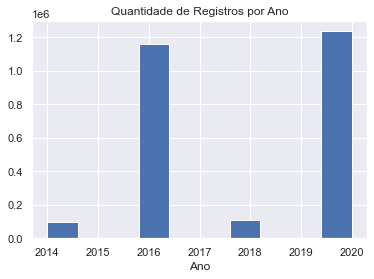

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Quantidade de Registros por Ano')
plt.xlabel('Ano')

In [96]:
heights = np.array(m_df_candidato_bem_cassacao['NR_IDADE_DATA_POSSE'])

Text(0.5, 0, 'Faixa Idade')

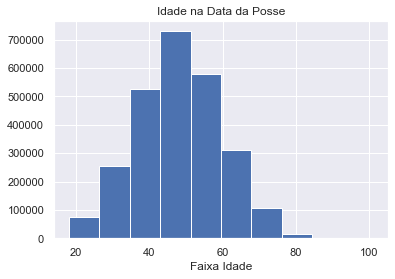

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Idade na Data da Posse')
plt.xlabel('Faixa Idade')

In [98]:
data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['SQ_CANDIDATO'] == 957857202)]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
935608,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,4,99,OUTROS BENS E DIREITOS,Bens em comum do casal,5.668874e+09,10/12/2020,17:19:26
750577,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,1,49,Outras aplicações e Investimentos,COTAS DE CAPITAL - CREDISIS CREDIARI,8.621000e+03,10/12/2020,17:19:26
625914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,3,45,"Aplicação de renda fixa (CDB, RDB e outros)",CREDISIS CREDIARE,7.934700e+02,10/12/2020,17:19:26
750576,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RO,78,ARIQUEMES,957857202,2,63,Dinheiro em espécie - moeda nacional,SALDO CC 1359-5 AG: 005 - CREDISIS CREDIARE -,1.267400e+02,10/12/2020,17:19:26


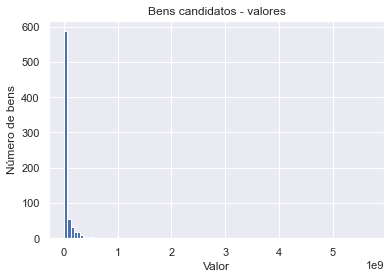

In [99]:
#Plotagem do histograma dos valores dos bens dos candidatos
data_frame_bem_maior_10_mil.VR_BEM_CANDIDATO.hist(bins=100) 
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de bens")
plt.title("Bens candidatos - valores")
plt.show()

In [100]:
 print('Para correção dos dados de renda insconsisência, optou-se por atualizar os valores acima de 10000000 dos candidatos não eleitos por 0')
for index, row in df_nao_eleito.iterrows():
    m_df_candidato_bem_cassacao.at[index , 'VR_BEM_CANDIDATO' ] = 0
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))    
    print('Valor Antigo: ' + str(row['VR_BEM_CANDIDATO']))
    print('Valor Atualizado: ' + str('0'))
    print('------------------------------------')

Para correção dos dados de renda insconsisência, optou-se por atualizar os valores acima de 10000000 dos candidatos não eleitos por 0
10831
Candidato: 111
Nome: IVONE MEZZOMO CASSOL
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 9.300.000 E/OU 62,00% COTAS DO CAPITAL SOCIAL DA EMPRESA HIDROSSOL - HIDROELETRICAS CASSOL LTDA. - CNPJ: 04.267.560/0001- 68,
Valor Antigo: 20021259.48
Valor Atualizado: 0
------------------------------------
12367
Candidato: 111
Nome: ILARIO BODANESE
Tipo de Bem: Terreno
Descrição: LOTE RURAL 11, LINHA 90, ST RIO DO OURO, PF CORUMBIARA
Valor Antigo: 15000000.0
Valor Atualizado: 0
------------------------------------
18269
Candidato: 255
Nome: RONALDO CEZAR COELHO
Tipo de Bem: Aplicação de renda fixa (CDB, RDB e outros)
Descrição: JUNTO AO BANCO ITAÚ-UNIBANCO SA CNPJ 60.701.190/0001-04
Valor Antigo: 11424825.67
Valor Atualizado: 0
------------------------------------
18280
Candidato: 255
Nome: RONALDO CEZAR COELHO
Tipo de Bem: Quotas ou quinhões de capit

Nome: AMARILDO MARTINS MARIANO
Tipo de Bem: Quotas ou quinhões de capital
Descrição: EMPRESA RENASCER AGRONEGOSSIOS
Valor Antigo: 33383000.0
Valor Atualizado: 0
------------------------------------
303769
Candidato: 19001
Nome: SILVANO LIMA
Tipo de Bem: Outros bens imóveis
Descrição: CASA
Valor Antigo: 200000000.0
Valor Atualizado: 0
------------------------------------
336466
Candidato: 19915
Nome: MARCIA RODRIGUES DOS SANTOS
Tipo de Bem: Casa
Descrição: CASA
Valor Antigo: 90000000.0
Valor Atualizado: 0
------------------------------------
342743
Candidato: 33500
Nome: WAGNER DOS REIS FERREIRA
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: VEICULOS
Valor Antigo: 60000000.0
Valor Atualizado: 0
------------------------------------
347338
Candidato: 45
Nome: NILO FERREIRA PINTO
Tipo de Bem: Outros bens imóveis
Descrição: VINTE E SEIS LOTES DE TERRENOS E RESPECTIVA ACESSÕES LOCALIZADOS NO BAIRRO IGUAÇU IPATINGA/MG
Valor Antigo: 12000000.0
Valor Atuali

649767
Candidato: 13
Nome: NELI MARIA FORTUNA DELORENZO
Tipo de Bem: Terra nua
Descrição: 5,0 HECTARES DE TERRA COM CASA
Valor Antigo: 25000000.0
Valor Atualizado: 0
------------------------------------
657890
Candidato: 17789
Nome: ALDENI VIEIRA DE OLIVEIRA
Tipo de Bem: Casa
Descrição: CASA
Valor Antigo: 13000000.0
Valor Atualizado: 0
------------------------------------
695024
Candidato: 15
Nome: ARGEMIRO RODRIGUES SANTOS NETO
Tipo de Bem: Terra nua
Descrição: 780 HECTARES DE TERRA DENOMINADA FAZENDA SAMAMBAIA NO MUNICIPIO DE CAIAPÔNIA.
Valor Antigo: 12000000.0
Valor Atualizado: 0
------------------------------------
702099
Candidato: 22
Nome: PEDRO RANGEL DE MENEZES
Tipo de Bem: Terra nua
Descrição: FAZENDA MEDINDO 310 ALQUEIRES LOCALIZADA NO MUNICIPIO DE SAO DOMINGOS DO ARAGUAIA - PARÁ
Valor Antigo: 12400000.0
Valor Atualizado: 0
------------------------------------
746684
Candidato: 55
Nome: CARLOS ALBERTO CAPELETTI
Tipo de Bem: Benfeitorias
Descrição: 25% DAS BEM FEITORIAS SOBRE 

996876
Candidato: 25000
Nome: ARYLTON COSTA FILHO
Tipo de Bem: Fundo de aplicação em quotas de fundos de investimento
Descrição: Seacoatings Química Industrial LTDA 
Valor Antigo: 20900000.0
Valor Atualizado: 0
------------------------------------
996877
Candidato: 25000
Nome: ARYLTON COSTA FILHO
Tipo de Bem: Fundo de aplicação em quotas de fundos de investimento
Descrição: quotas de capital -Comercial Estrela da manhã S/A ltda
Valor Antigo: 15000000.0
Valor Atualizado: 0
------------------------------------
996878
Candidato: 25000
Nome: ARYLTON COSTA FILHO
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: renault Clio 2001
Valor Antigo: 15000000.0
Valor Atualizado: 0
------------------------------------
1041839
Candidato: 11
Nome: JURACI FREIRE MARTINS
Tipo de Bem: Outros bens móveis
Descrição: 15.188 SEMOVENTES, SENDO 15.114 BOVINOS E 74 EQUIDEOS
Valor Antigo: 15188000.0
Valor Atualizado: 0
------------------------------------
1046042
Candidato: 362

1277610
Candidato: 151
Nome: EUNÍCIO LOPES DE OLIVEIRA
Tipo de Bem: Quotas ou quinhões de capital
Descrição: APORTE PARA FUTURO AUMENTO DO CAPITAL SOCIAL NA SOC. STA MONICA AGROP. E SERVS. LTDA
Valor Antigo: 14524731.58
Valor Atualizado: 0
------------------------------------
1285402
Candidato: 251
Nome: WILDER PEDRO DE MORAIS
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: #NULO#
Valor Antigo: 15839670.0
Valor Atualizado: 0
------------------------------------
1290349
Candidato: 300
Nome: DIOGO RIBEIRO DA LUZ
Tipo de Bem: Depósito bancário em conta corrente no exterior
Descrição: #NULO#
Valor Antigo: 13584905.0
Valor Atualizado: 0
------------------------------------
1292349
Candidato: 432
Nome: CLOVIS ANTONIO CHAVES FECURY
Tipo de Bem: Quotas ou quinhões de capital
Descrição: #NULO#
Valor Antigo: 19500000.0
Valor Atualizado: 0
------------------------------------
1295557
Candidato: 251
Nome: DOMINGOS SÁVIO GOMES DE OLIVEIRA
Tipo de Bem: Outros fundos
Des

Nome: FERNANDO CESAR DE CAMARGO ROSSETO
Tipo de Bem: Casa
Descrição: 1) 50% (cinquenta por cento) de uma casa residencial adquirida em 2001/2002, por recursos próprios, localizada na Rua Iguará, n° 417, casa 6 - Vila Alpina. Valor de R$ 850.000,00
Valor Antigo: 850000000.0
Valor Atualizado: 0
------------------------------------
1350852
Candidato: 456
Nome: GERALDO JOSE DA CAMARA FERREIRA DE MELO
Tipo de Bem: Outras participações societárias
Descrição: #NULO#
Valor Antigo: 25046138.0
Valor Atualizado: 0
------------------------------------
1358017
Candidato: 9089
Nome: BEETHOVEN ELIAS DE OLIVEIRA
Tipo de Bem: Casa
Descrição: localizado em Paraibuna no valor de R$ 600.000,00
Valor Antigo: 600000000.0
Valor Atualizado: 0
------------------------------------
1359907
Candidato: 33777
Nome: MARIANA MACEDO 
Tipo de Bem: Quotas ou quinhões de capital
Descrição: doação de 97% restante equivalente R$ 15.269313,20 das quotas de capital do socio José Maria Macedo JUior, CPF 197.057.864-53- adquir

1784988
Candidato: 15
Nome: WALÉRIO RODRIGUES DOS SANTOS
Tipo de Bem: Terra nua
Descrição: 400.12 hectares de terra, situada na região do Chapadão, denominada Fazenda Mata Azul, no Município de Caiapônia. 
Valor Antigo: 10274000.0
Valor Atualizado: 0
------------------------------------
1827589
Candidato: 45
Nome: FRANCISLENE ASSIS DE ALMEIDA CORREA
Tipo de Bem: OUTROS BENS E DIREITOS
Descrição: SALDO EMPRESTIMO PARTICULAR CONCEDIDO FRAN A.A EMPREENDIMENTOS IMOBILIARIOS
Valor Antigo: 13281000.0
Valor Atualizado: 0
------------------------------------
1830400
Candidato: 25
Nome: EUCLASIO GARRUTTI
Tipo de Bem: Outros bens imóveis
Descrição: FAZENDA XORORO - AGUA BOA - MT
Valor Antigo: 40000000.0
Valor Atualizado: 0
------------------------------------
1830401
Candidato: 25
Nome: EUCLASIO GARRUTTI
Tipo de Bem: Outros bens imóveis
Descrição: FAZENDA SANTA MARIA IV - SÃO FELIX DO ARAGUAIA
Valor Antigo: 12000000.0
Valor Atualizado: 0
------------------------------------
1830402
Candidato: 25

2137655
Candidato: 22
Nome: ROMILDO VELOSO E SILVA
Tipo de Bem: Terra nua
Descrição: GLEBA RURAL SITUADA NA VC PACHIBAL, TUCUMÃ-PA
Valor Antigo: 11000000.0
Valor Atualizado: 0
------------------------------------
2150137
Candidato: 45
Nome: JOÃO RIBEIRO BARROSO
Tipo de Bem: Outros créditos e poupança vinculados
Descrição: CRÉDITOS NA EMPRESA ENGEXATA ENGENHARIA LTDA
Valor Antigo: 10219573.7
Valor Atualizado: 0
------------------------------------
2162549
Candidato: 17
Nome: ANTONIO LOPES DE ANGELO
Tipo de Bem: Outros bens imóveis
Descrição: Propriedade Rural
Valor Antigo: 18000000.0
Valor Atualizado: 0
------------------------------------
2162551
Candidato: 17
Nome: ANTONIO LOPES DE ANGELO
Tipo de Bem: Outros bens imóveis
Descrição: Propriedade Rural
Valor Antigo: 24000000.0
Valor Atualizado: 0
------------------------------------
2163552
Candidato: 23
Nome: ANTONIO EDUARDO TONIELO
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 25% DE COTAS DA EMPRESA VIRALCOOL ACUCAR E ALCOOL L

Descrição: gol, placa NSJ8778, chassi  9BWAA05WBAPO52229
Valor Antigo: 18000000.0
Valor Atualizado: 0
------------------------------------
2474697
Candidato: 22
Nome: HAMILTON DOS SANTOS SOUSA
Tipo de Bem: Casa
Descrição: Pedro Ludovico Teixeira, n. 28
Valor Antigo: 250000000.0
Valor Atualizado: 0
------------------------------------
2478494
Candidato: 14123
Nome: EMERSON DO SOCORRO GONÇALVES ALVES
Tipo de Bem: Embarcação
Descrição: UM BARCO A MOTOR DE 25 CAVALOS YAMAHA
Valor Antigo: 38000000.0
Valor Atualizado: 0
------------------------------------
2500117
Candidato: 13
Nome: FRANCISCO DA COSTA ARAUJO FILHO
Tipo de Bem: Crédito decorrente de empréstimo
Descrição: EMPRESTIMO JUNTO A EMPRESA CONSTRUTORA SOMA LTDA, CNPJ-03.611.978/0001-88
Valor Antigo: 10969500.0
Valor Atualizado: 0
------------------------------------
2528089
Candidato: 55
Nome: WILDER PEDRO DE MORAIS
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 68,57% DO CAPITAL SOCIAL  DA ORCA CONSTUTORA LTDA
Valor Antigo: 1

In [101]:
df_10_mil_remo = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [102]:
df_10_mil_remo

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF_x,SG_UE_x,DS_SIT_TOT_TURNO,...,SG_UF_y,SG_UE_y,NM_UE,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
2598,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,39.0,31.0,Ações (inclusive as provenientes de linha tele...,LAGINHA AGRO INDUSTRIAL S/A,1.960319e+08,12/07/2018,16:35:40
2602,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,42.0,32.0,Quotas ou quinhões de capital,LUG TAXI AEREO LTDA,1.498795e+07,12/07/2018,16:35:40
2626,-1474836205,2014,5578,JOÃO JOSÉ PEREIRA DE LYRA,DEPUTADO FEDERAL,55,PSD,AL,AL,SUPLENTE,...,AL,AL,ALAGOAS,49.0,31.0,Ações (inclusive as provenientes de linha tele...,INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUST...,1.629974e+07,12/07/2018,16:35:40
6578,-1539606910,2014,4567,JOÃO GUALBERTO VASCONCELOS,DEPUTADO FEDERAL,45,PSDB,BA,BA,ELEITO POR QP,...,BA,BA,BAHIA,10.0,32.0,Quotas ou quinhões de capital,QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA,3.937500e+07,12/07/2018,16:35:46
18936,-518167936,2014,155,GENÉSIO AYRES MARCHETTI,2º SUPLENTE,55,PSD,SC,SC,ELEITO,...,SC,SC,SANTA CATARINA,2.0,32.0,Quotas ou quinhões de capital,PARTICIPACAO SOCIETARIA NA EMPRESA AYMADA EMPR...,1.832394e+07,12/07/2018,16:36:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583252,1151975940,2020,12,JOSE DONIZETE ALMEIDA MAIA,PREFEITO,12,PDT,MG,47074,ELEITO,...,MG,47074,JECEABA,10.0,32.0,Quotas ou quinhões de capital,Sócio Diretor da Empresa CRM Empreendimentos L...,1.100000e+07,15/11/2020,23:35:36
2591729,-193471333,2020,25,ARGEMIRO RODRIGUES SANTOS NETO,PREFEITO,25,DEM,GO,92878,ELEITO,...,GO,92878,CAIAPÔNIA,24.0,14.0,Terra nua,UMA AREA DE TERRA FAZENDA BALSAMO SITUADA NEST...,1.611000e+07,15/11/2020,21:33:22
2591745,-193471333,2020,25,ARGEMIRO RODRIGUES SANTOS NETO,PREFEITO,25,DEM,GO,92878,ELEITO,...,GO,92878,CAIAPÔNIA,2.0,14.0,Terra nua,"UMA GLEBA DE TERRAS NA FAZENDA INVERNADA, LUGA...",2.682260e+07,15/11/2020,21:33:22
2596641,-1797956703,2020,11690,LUIZ FELIPE DE LIMA CINTRA,VEREADOR,11,PP,PE,25356,SUPLENTE,...,PE,25356,RIBEIRÃO,1.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",Celtade placa PFN 7680 de cor vermelha,1.800000e+07,25/11/2020,15:51:46


In [103]:
 for index, row in df_10_mil_remo.iterrows():
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Ano Eleição: ' + str(row['ANO_ELEICAO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))    
    print('Valor Antigo: ' + str(row['VR_BEM_CANDIDATO']))
    print('------------------------------------')

2598
Candidato: 5578
Ano Eleição: 2014
Nome: JOÃO JOSÉ PEREIRA DE LYRA
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: LAGINHA AGRO INDUSTRIAL S/A
Valor Antigo: 196031864.0
------------------------------------
2602
Candidato: 5578
Ano Eleição: 2014
Nome: JOÃO JOSÉ PEREIRA DE LYRA
Tipo de Bem: Quotas ou quinhões de capital
Descrição: LUG TAXI AEREO LTDA
Valor Antigo: 14987952.0
------------------------------------
2626
Candidato: 5578
Ano Eleição: 2014
Nome: JOÃO JOSÉ PEREIRA DE LYRA
Tipo de Bem: Ações (inclusive as provenientes de linha telefônica)
Descrição: INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON
Valor Antigo: 16299739.0
------------------------------------
6578
Candidato: 4567
Ano Eleição: 2014
Nome: JOÃO GUALBERTO VASCONCELOS
Tipo de Bem: Quotas ou quinhões de capital
Descrição: QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA
Valor Antigo: 39375000.0
------------------------------------
18936
Candidato: 155
Ano Eleição: 

------------------------------------
826789
Candidato: 20777
Ano Eleição: 2016
Nome: ARILDO MOTA DOS SANTOS
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: AUTOMOVEL TIPO PICK UP FIAT STRADA 2013, PLACA OTX 5720.
Valor Antigo: 35000000.0
------------------------------------
863977
Candidato: 22320
Ano Eleição: 2016
Nome: FRANCISCO ALVES DE SOUSA
Tipo de Bem: Casa
Descrição: Q. 12 MR 03 LOTE 14 SETOR OESTE
Valor Antigo: 15000000.0
------------------------------------
871260
Candidato: 31
Ano Eleição: 2016
Nome: VITTORIO MEDIOLI
Tipo de Bem: Quotas ou quinhões de capital
Descrição: SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUUOTAS DE CAPITAL DA EMPRESA SEMPRE EDITORA SEMPRE EDITORA LTDA
Valor Antigo: 63810000.0
------------------------------------
871281
Candidato: 31
Ano Eleição: 2016
Nome: VITTORIO MEDIOLI
Tipo de Bem: Quotas ou quinhões de capital
Descrição: DUZENTOS E OITENTA E CINCO MILHOES NOVECENTOS E VINTE  E NOVE MIL E DUZENTOS E TRINTA 

Tipo de Bem: Terreno
Descrição: #NULO#
Valor Antigo: 1000000000.0
------------------------------------
1353977
Candidato: 30
Ano Eleição: 2018
Nome: ROMEU ZEMA NETO
Tipo de Bem: Quotas ou quinhões de capital
Descrição: 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53
Valor Antigo: 60514129.0
------------------------------------
1354735
Candidato: 123
Ano Eleição: 2018
Nome: PRISCO RODRIGUES BEZERRA
Tipo de Bem: Outras aplicações e Investimentos
Descrição: #NULO#
Valor Antigo: 34186691.2
------------------------------------
1357415
Candidato: 55777
Ano Eleição: 2018
Nome: VALMIR QUEIROZ MARIANO
Tipo de Bem: Benfeitorias
Descrição: BENFEITORIAS IMPLANTADAS - PROPRIEDADE RURAL FAZENDA MONTANA - ÁREA DE 4.536.000 HA. - CUMARÚ DO NORTE/PA
Valor Antigo: 13145500.0
------------------------------------
1358874
Candidato: 109
Ano Eleição: 2018
Nome: PEDRO CHAVES DOS SANTOS FILHO
Tipo de Bem: Outras participações societárias
Descrição: #NULO#
Valor Antigo: 1272

Descrição:  Uma chácara localizada no bairro Km 9, Mafra/SC, de 30.000 m², contendo duas casas, uma de alvenaria de 300m² e outra de madeira medindo 140 m², dois barracões de madeira medindo 200 m²
Valor Antigo: 400000000.0
------------------------------------
2328149
Candidato: 25102
Ano Eleição: 2020
Nome: IRINEU JOSE MUNARO
Tipo de Bem: Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Descrição: 1(um) Veículo Yhundai IX35, ano 2012
Valor Antigo: 65000000.0
------------------------------------
2329428
Candidato: 25345
Ano Eleição: 2020
Nome: RAQUEL MELEZ MARTINS
Tipo de Bem: OUTROS BENS E DIREITOS
Descrição: 50% do imóvel Rural , sito Sitio Floripa no município de Iguatemi/MS 
Valor Antigo: 1200000000.0
------------------------------------
2338143
Candidato: 22
Ano Eleição: 2020
Nome: ANTÔNIO ROBERTO BERGAMASCO
Tipo de Bem: Outros bens móveis
Descrição: MÁQUINAS, VEÍCULOS, EQUIPAMENTOS E BENS VÍNCULADOS A ATIDADE RURAL.
Valor Antigo: 10841150.41
--------------------------